In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

In [15]:
data_dir = '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random'
data_dir_test = '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/test/'
root = 'galaxies_blended_20191024'

In [16]:
dfs = []

dfs.append(pd.read_csv(os.path.join(data_dir_test, root+'_0_data.csv')))
df = dfs[0]

for df2 in dfs[1:]:
    df = df.append(df2)

In [18]:
test_img = np.load(data_dir+'/test/galaxies_blended_20191024_0_images.npy', mmap_mode = 'c')
training_img = np.load(data_dir+'/training/galaxies_blended_20191024_0_images.npy', mmap_mode = 'c')

test_data = pd.read_csv(data_dir+'/test/galaxies_blended_20191024_0_data_classified.csv')
training_data = pd.read_csv(data_dir+'/training/galaxies_blended_20191024_0_data_classified.csv')

In [19]:
test_img.shape, training_img.shape

((10000, 2, 10, 64, 64), (10000, 2, 10, 64, 64))

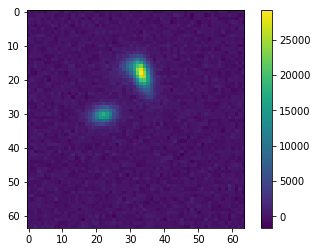

In [20]:
plt.imshow(test_img[3,1,6])
plt.colorbar()

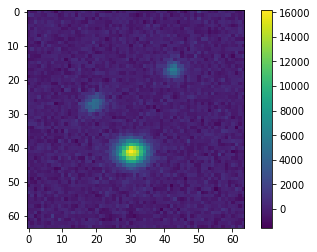

In [21]:
plt.imshow(training_img[3,1,6])
plt.colorbar()

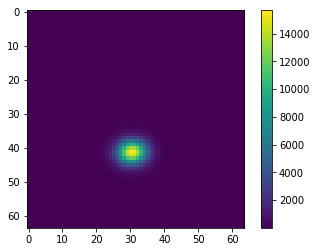

In [24]:
plt.imshow(training_img[3,0,6])
plt.colorbar()

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Unnamed: 0    10000 non-null int64
redshift_0    10000 non-null float64
e1_0          10000 non-null float64
e2_0          10000 non-null float64
mag_0         10000 non-null float64
redshift_1    10000 non-null float64
e1_1          10000 non-null float64
e2_1          10000 non-null float64
mag_1         10000 non-null float64
redshift_2    10000 non-null float64
e1_2          10000 non-null float64
e2_2          10000 non-null float64
mag_2         10000 non-null float64
redshift_3    10000 non-null float64
e1_3          10000 non-null float64
e2_3          10000 non-null float64
mag_3         10000 non-null float64
dtypes: float64(16), int64(1)
memory usage: 1.3 MB


In [23]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Unnamed: 0    10000 non-null int64
redshift_0    10000 non-null float64
e1_0          10000 non-null float64
e2_0          10000 non-null float64
mag_0         10000 non-null float64
redshift_1    10000 non-null float64
e1_1          10000 non-null float64
e2_1          10000 non-null float64
mag_1         10000 non-null float64
redshift_2    10000 non-null float64
e1_2          10000 non-null float64
e2_2          10000 non-null float64
mag_2         10000 non-null float64
redshift_3    10000 non-null float64
e1_3          10000 non-null float64
e2_3          10000 non-null float64
mag_3         10000 non-null float64
dtypes: float64(16), int64(1)
memory usage: 1.3 MB


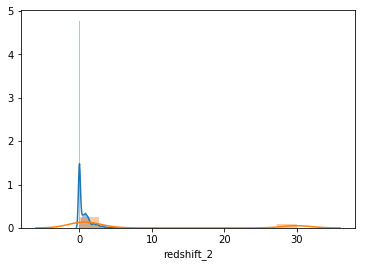

In [22]:
sns.distplot(test_data['redshift_2'])
sns.distplot(training_data['redshift_2'])